In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import numpy as np
from floquet_simulations.plot_functions import PlotParams
import scipy.integrate as integrate
from numpy import pi, sin, cos
from scipy.special import jv
PlotParams()
def ConvertToFloat(frac_str):
    try:
        return float(frac_str)
    except ValueError:
        try:
            num, denom = frac_str.split('/')
        except ValueError:
            return None
        try:
            leading, num = num.split(' ')
        except ValueError:
            return float(num) / float(denom)        
        if float(leading) < 0:
            sign_mult = -1
        else:
            sign_mult = 1
        return float(leading) + sign_mult * (float(num) / float(denom))
    
def f_J12(A2, A3, omega0, phi3):
    
    alpha = 1
    
    omega2 = alpha*omega0

    J12 = jv(0,A2/omega2)


    return np.abs(J12)



def f_J23(A2, A3, omega0, phi3):
    
    alpha = 1
    beta = 2
    
    omega2 = alpha*omega0
    omega3 = beta*omega0

    # first term expansion term
    J23_real = omega0/2/pi*integrate.quad(lambda t: cos(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -pi/omega0, pi/omega0)[0]
    J23_imag = 1j*omega0/2/pi*integrate.quad(lambda t: sin(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -pi/omega0, pi/omega0)[0]
    # we are removing esimate of absolute error
    J23 = J23_real + J23_imag


    return np.abs(J23)

    
def f_J31(A2, A3, omega0, phi3):
    

    beta = 2

    omega3 = beta*omega0


    J31 = jv(0, A3/omega3)


    return np.abs(J31)

def Mid(v1, v2, v3):
   return v1+v2+v3 - np.max([v1, v2, v3])-np.min([v1, v2, v3])

def f_xi(A2, A3, omega0, phi3):
    
    alpha = 1
    beta = 2
    
    omega2 = alpha*omega0
    omega3 = beta*omega0

    # first term expansion term
    J23_real = omega0/2/pi*integrate.quad(lambda t: cos(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -pi/omega0, pi/omega0)[0]
    J23_imag = 1j*omega0/2/pi*integrate.quad(lambda t: sin(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -pi/omega0, pi/omega0)[0]
    # we are removing esimate of absolute error
    J23 = J23_real + J23_imag


    J31 = jv(0, A3/omega3)
    J12 = jv(0,A2/omega2)

    xi = np.angle(J12*J31*J23)

    # r1 = Mid(np.abs(J31), np.abs(J23), np.abs(J12)) / np.max([np.abs(J31), np.abs(J23), np.abs(J12)])
    # r2 = np.min([np.abs(J12), np.abs(J23), np.abs(J31)]) / np.max([np.abs(J12), np.abs(J23), np.abs(J31)])

    # return r1, r2, xi

    return xi

def f_r1(A2, A3, omega0, phi3):
    
    alpha = 1
    beta = 2
    
    omega2 = alpha*omega0
    omega3 = beta*omega0

    # first term expansion term
    J23_real = omega0/2/pi*integrate.quad(lambda t: cos(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -pi/omega0, pi/omega0)[0]
    J23_imag = 1j*omega0/2/pi*integrate.quad(lambda t: sin(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -pi/omega0, pi/omega0)[0]
    # we are removing esimate of absolute error
    J23 = J23_real + J23_imag


    J31 = jv(0, A3/omega3)
    J12 = jv(0,A2/omega2)

    # xi = np.arg(J12*J31*J23)

    r1 = Mid(np.abs(J31), np.abs(J23), np.abs(J12)) / np.max([np.abs(J31), np.abs(J23), np.abs(J12)])
    # r2 = np.min([np.abs(J12), np.abs(J23), np.abs(J31)]) / np.max([np.abs(J12), np.abs(J23), np.abs(J31)])

    # return r1, r2, xi

    return r1



def f_r2(A2, A3, omega0, phi3):
    
    alpha = 1
    beta = 2
    
    omega2 = alpha*omega0
    omega3 = beta*omega0

    # first term expansion term
    J23_real = omega0/2/pi*integrate.quad(lambda t: cos(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -pi/omega0, pi/omega0)[0]
    J23_imag = 1j*omega0/2/pi*integrate.quad(lambda t: sin(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -pi/omega0, pi/omega0)[0]
    # we are removing esimate of absolute error
    J23 = J23_real + J23_imag


    J31 = jv(0, A3/omega3)
    J12 = jv(0,A2/omega2)

    # xi = np.arg(J12*J31*J23)

    # r1 = Mid(np.abs(J31), np.abs(J23), np.abs(J12)) / np.max([np.abs(J31), np.abs(J23), np.abs(J12)])
    r2 = np.min([np.abs(J12), np.abs(J23), np.abs(J31)]) / np.max([np.abs(J12), np.abs(J23), np.abs(J31)])

    # return r1, r2, xi

    return r2

In [2]:
omega0 = 8
alpha=1; beta=2
data_dir = Path().absolute().parent.parent.parent/"paper_data"/"numerical_optimisation"/"continuous_neighbourhood_grad_descent_findminimum_initial_conds.csv"
# data_dir = Path().absolute().parent.parent.parent/"paper_data"/f"grad_descent_findminimum_truevals.csv"
# data_dir = Path().absolute().parent.parent.parent/"paper_data"/"numerical_optimisation"/"smooth_optimisation_data_(x,y)=(.5,.3).csv"

In [3]:
df = pd.read_csv(data_dir,
                  index_col=False,
                   converters={"xi0_frac": ConvertToFloat
                   }
                  )

In [38]:
r10 = 1
r20 = 1

dfI = df[(df.xi0_frac <=1)
        &(df.r10 == r10)
        &(df.r20 == r20)
        # &(df.b == 20)
        # &(df.c == 20)
        # &(df.algo ==
        #    "FindMinimum,PG=3,AG=3,MI=inf,imported_ic_smart4.0")
          # "FindMinimum,PG=5,AG=5,MI=inf,w=8,use_last_ic,3")

        ]
dfI = dfI.sort_values(by="xi0_frac")
dfI.xi0_frac = np.round(dfI.xi0_frac.to_list(), 3)


In [18]:
algos = dfI.algo.unique()
print(algos)

['FindMinimum,PG=4,AG=4,MI=inf,w=8,imported_ic_smart4.0'
 'FindMinimum,PG=5,AG=5,MI=inf,w=8,imported_ic_smart5.0'
 'FindMinimum,PG=3,AG=3,MI=inf,imported_ic_smart4.0'
 'FindMinimum,PG=7,AG=7,MI=inf,w=8,imported_ic_smart5.0']


In [34]:
dfP = dfI[(df.algo == algos[2])]

/tmp/ipykernel_14102/1151976872.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfP = dfI[(df.algo == algos[2])]


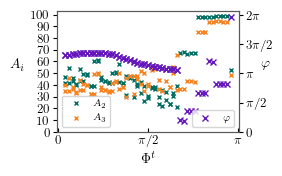

In [37]:
figsize = (6/2.56, 4/2.56)

fig, ax1 = plt.subplots(figsize=figsize)
ax1.plot(dfP.xi0_frac, dfP.A2, 'x', c="#006F63", label=r"$A_2$", ms = 3)
ax1.plot(dfP.xi0_frac, dfP.A3, 'x', c="#F78320", label=r"$A_3$", ms = 3)
ax1.set_yticks([ 0,10, 20, 30,40, 50, 60, 70, 80, 90,100])
ax1.set_xticks(np.linspace(-1,1,5))
ax1.set_xticklabels([r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"])

ax1.set_xlabel(r"$\Phi^t$")
# ax1.set_title(rf"$(r_0^1, r_0^2) =({r10},{r20})$, $(\alpha,\beta)=({alpha},{beta})$")
ax1.set_ylabel(r"$A_i$", rotation=0, labelpad=10, y=0.5)

ax2 = ax1.twinx()
# ax2.plot(dfP[dfP.xi0_frac <0].xi0_frac, dfP[dfP.xi0_frac <0].phi, '--', c="#6517BC", label=r"$\varphi$", ms = 1)
ax2.plot(dfP[dfP.xi0_frac >0].xi0_frac, dfP[dfP.xi0_frac >0].phi, 'x', c="#6517BC", ms = 5, label=r"$\varphi$",)
ax2.set_yticks([0, pi/2, pi, 3*pi/2, 2*pi])
ax2.set_yticklabels([ r"$0$", r"$\pi/2$", r"$\pi$",  r"$3\pi/2$", r"$2\pi$"])
ax2.set_ylabel(r"$\varphi$", rotation=0, labelpad = -5, y=0.62)
leg = ax1.legend(loc='lower left', bbox_to_anchor=(0, 0))
leg2 = ax2.legend(loc='lower right', bbox_to_anchor=(1, 0))
# plt.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_paper"/f"flux_drive_params_findmin_nh=({r10},{r20})_alpha,beta={alpha},{beta}.pdf", format="pdf", bbox_inches="tight"
            # , dpi=1860
            # )
plt.show()

In [32]:
dfP["absJ12"] = dfP.apply(lambda row : f_J12(row["A2"],
                     row['A3'], row['omega'], row['phi']), axis = 1)

dfP["absJ23"] = dfP.apply(lambda row : f_J23(row["A2"],
                     row['A3'], row['omega'], row['phi']), axis = 1)

dfP["absJ31"] = dfP.apply(lambda row : f_J31(row["A2"],
                     row['A3'], row['omega'], row['phi']), axis = 1)

dfP["xi"] = dfP.apply(lambda row : f_xi(row["A2"],
                     row['A3'], row['omega'], row['phi']), axis = 1)

dfP["r1"] = dfP.apply(lambda row : f_r1(row["A2"],
                     row['A3'], row['omega'], row['phi']), axis = 1)

dfP["r2"] = dfP.apply(lambda row : f_r2(row["A2"],
                     row['A3'], row['omega'], row['phi']), axis = 1)

/tmp/ipykernel_14102/2783040871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfP["absJ12"] = dfP.apply(lambda row : f_J12(row["A2"],
/tmp/ipykernel_14102/2783040871.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfP["absJ23"] = dfP.apply(lambda row : f_J23(row["A2"],
/tmp/ipykernel_14102/2783040871.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [28]:
dfP.columns

Index(['algo', 'r10', 'r20', 'xi0_frac', 'a', 'b', 'c', 'A2', 'A3', 'omega',
       'phi', 'error', 'A2_ic', 'A3_ic', 'omega_ic', 'varphi_frac_ic',
       'absJ12', 'absJ23', 'absJ31'],
      dtype='object')

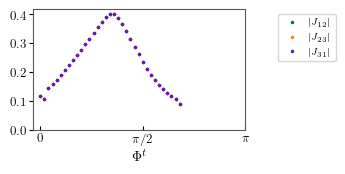

In [33]:
figsize = (7/2.56, 4/2.56)
marker = "."
marker_size = 3
fig, ax = plt.subplots(figsize=figsize)
ax.plot(dfP.xi0_frac, dfP.absJ12, marker, ms = marker_size, c="#006F63", label=r"$|J_{12}|$")
ax.plot(dfP.xi0_frac, dfP.absJ23, marker, ms = marker_size, c="#F78320", label=r"$|J_{23}|$")
ax.plot(dfP.xi0_frac, dfP.absJ31, marker, ms = marker_size, c="#6517BC", label=r"$|J_{31}|$")
ax.set_xticks(np.linspace(0,1,3))
ax.set_xticklabels([  r"$0$", r"$\pi/2$", r"$\pi$"])
ax.set_xlabel(r"$\Phi^t$")
ax.set_yticks(np.linspace(0, 0.4, 5))
# ax.set_title(rf"$(r_0^1, r_0^2) =({r10},{r20})$, $(\alpha,\beta)=({alpha},{beta})$")
leg = ax.legend(loc='upper right', bbox_to_anchor=(1.45,1))
# plt.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_paper"/f"flux_J_params_findmin_nh=({r10},{r20})_alpha,beta={alpha},{beta}.pdf", format="pdf", bbox_inches="tight"
            # , dpi=1860
            # )
plt.show()

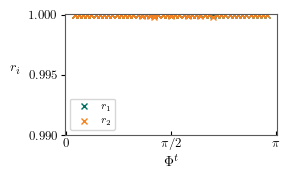

In [25]:
figsize = (7/2.56, 4/2.56)
marker = "x"
marker_size = 5
fig, ax = plt.subplots(figsize=figsize)
ax.plot(dfP.xi0_frac, dfP.r1, marker, ms = marker_size, c="#006F63", label=r"$r_1$")
ax.plot(dfP.xi0_frac, dfP.r2, marker, ms = marker_size, c="#F78320", label=r"$r_2$")
ax.set_xticks(np.linspace(0,1,3))
ax.set_xticklabels([  r"$0$", r"$\pi/2$", r"$\pi$"])
ax.set_xlabel(r"$\Phi^t$")
ax.set_ylabel(r"$r_i$", rotation=0, labelpad=10, y=0.5)
ax.set_yticks(np.linspace(0.99, 1, 3))
# ax.set_title(rf"$(r_0^1, r_0^2) =({r10},{r20})$, $(\alpha,\beta)=({alpha},{beta})$")
leg = ax.legend(loc='lower left', bbox_to_anchor=(0,0))
# plt.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_paper"/f"flux_J_params_findmin_nh=({r10},{r20})_alpha,beta={alpha},{beta}.pdf", format="pdf", bbox_inches="tight"
            # , dpi=1860
            # )
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


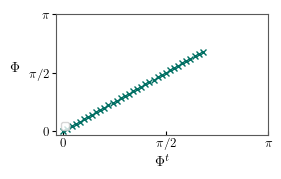

In [13]:
figsize = (7/2.56, 4/2.56)
marker = "x"
marker_size = 5
fig, ax = plt.subplots(figsize=figsize)
ax.plot(dfP.xi0_frac, dfP.xi, marker, ms = marker_size, c="#006F63")
ax.set_xticks(np.linspace(0,1,3))
ax.set_xticklabels([  r"$0$", r"$\pi/2$", r"$\pi$"])
ax.set_xlabel(r"$\Phi^t$")
ax.set_ylabel(r"$\Phi$", rotation=0, labelpad=10, y=0.5)
ax.set_yticks(np.linspace(0,pi, 3))
ax.set_yticklabels([  r"$0$", r"$\pi/2$", r"$\pi$"])
# ax.set_title(rf"$(r_0^1, r_0^2) =({r10},{r20})$, $(\alpha,\beta)=({alpha},{beta})$")
leg = ax.legend(loc='lower left', bbox_to_anchor=(0,0))
# plt.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_paper"/f"flux_J_params_findmin_nh=({r10},{r20})_alpha,beta={alpha},{beta}.pdf", format="pdf", bbox_inches="tight"
            # , dpi=1860
            # )
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


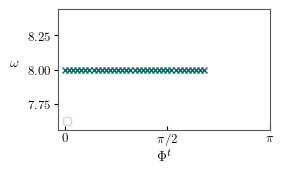

In [14]:
figsize = (7/2.56, 4/2.56)
marker = "x"
marker_size = 5
fig, ax = plt.subplots(figsize=figsize)
ax.plot(dfP.xi0_frac, dfP.omega, marker, ms = marker_size, c="#006F63")
ax.set_xticks(np.linspace(0,1,3))
ax.set_xticklabels([  r"$0$", r"$\pi/2$", r"$\pi$"])
ax.set_xlabel(r"$\Phi^t$")
ax.set_ylabel(r"$\omega$", rotation=0, labelpad=10, y=0.5)
# ax.set_yticks(np.linspace(0,pi, 3))
# ax.set_yticklabels([  r"$0$", r"$\pi/2$", r"$\pi$"])
# ax.set_title(rf"$(r_0^1, r_0^2) =({r10},{r20})$, $(\alpha,\beta)=({alpha},{beta})$")
leg = ax.legend(loc='lower left', bbox_to_anchor=(0,0))
# plt.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_paper"/f"flux_J_params_findmin_nh=({r10},{r20})_alpha,beta={alpha},{beta}.pdf", format="pdf", bbox_inches="tight"
            # , dpi=1860
            # )
plt.show()

In [65]:
dfP.to_csv(Path().absolute().parent.parent.parent/"paper_data"/f"initialconds_pito2pi_r1,r2=0.5,0.3.csv",
                    index=False, 
                    # columns=["A2", "A3", "omega0", "alpha", "beta", "J12", "J23", "J31"]
                    )